# Exploratory Analysis by Time Segment (Manual Path)
1. Update `input_path` to point to your CSV file.
2. Run all cells to assign time segments and visualize feature trends.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# 1) Set your CSV file path here and update if needed:
input_path = Path(r"C:\store\git\km-stat-activity\data\real\km_stat_acer_20250414_directional_changes_with_bbox_with_acceleration_with_idle_entropy_fixed2_with_linearity.csv")

# 2) Read data with x, y parsed, and parse datetime columns
df = pd.read_csv(
    input_path,
    converters={"x": pd.eval, "y": pd.eval},
    parse_dates=["start_date_time", "end_date_time"]
)
print("Loaded CSV from:", input_path)
print("Total rows:", len(df))

Loaded CSV from: C:\store\git\km-stat-activity\data\real\km_stat_acer_20250414_directional_changes_with_bbox_with_acceleration_with_idle_entropy_fixed2_with_linearity.csv
Total rows: 55110


In [4]:
# 3) Define time segments based on your specified intervals
def time_segment(ts):
    h = ts.hour + ts.minute/60
    if 8.5  <= h < 10:    return "morning_start"    # 08:30–10:00
    if 11   <= h < 12.5:  return "pre_lunch"        # 11:00–12:30
    if 13.5 <= h < 15.5:  return "post_lunch"       # 13:30–15:30
    if 15.5 <= h < 17:    return "afternoon_peak"   # 15:30–17:00
    if 17   <= h < 17.5:  return "end_of_day"       # 17:00–17:30
    return "other"

df["segment"] = df["start_date_time"].map(time_segment)
print("Segments assigned. Unique segments:", df["segment"].unique())

Segments assigned. Unique segments: ['morning_start' 'other' 'pre_lunch' 'post_lunch' 'afternoon_peak'
 'end_of_day']


In [5]:
# 4) Filter data for a single user (update profile_guid if needed)
user_id = "013d5cac-f09d-48a5-bff1-00d81c91b017"  # replace with your profile_guid
df_user = df[df["profile_guid"] == user_id].copy()
print("Filtered for user:", user_id, "Rows:", len(df_user))

Filtered for user: 013d5cac-f09d-48a5-bff1-00d81c91b017 Rows: 608


In [6]:
# 5) Summarize features by date and segment
features = ["avg_speed","avg_acceleration","mouse_idle_ratio","movement_entropy","linearity"]
summary = (
    df_user
    .groupby(["date","segment"])[features]
    .mean()
    .reset_index()
)
print("Summary DataFrame:")
display(summary.head())

Summary DataFrame:


,date,segment,avg_speed,avg_acceleration,mouse_idle_ratio,movement_entropy,linearity
0,2025-04-14,afternoon_peak,118.570687,-0.019643,0.730315,2.310463,0.136683
1,2025-04-14,end_of_day,79.451619,0.000515,0.875757,1.073335,0.120727
2,2025-04-14,morning_start,166.306713,0.053257,0.624234,3.220617,0.091127
3,2025-04-14,other,75.363160,0.021243,0.846348,1.318609,0.075953
4,2025-04-14,post_lunch,161.070557,-0.026629,0.598812,3.387561,0.097478


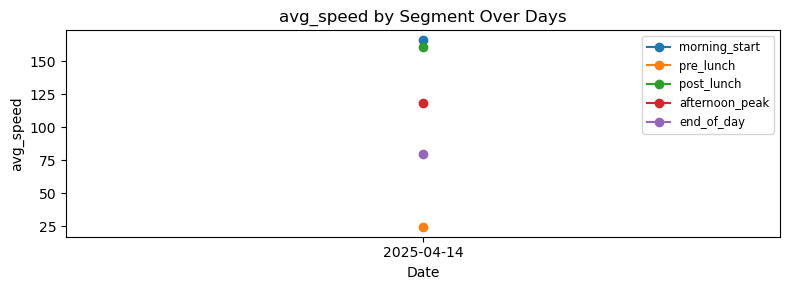

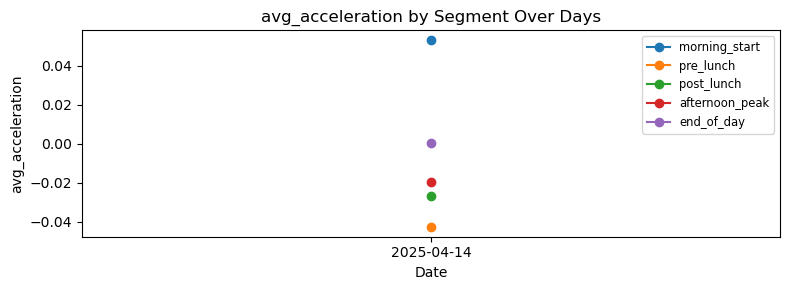

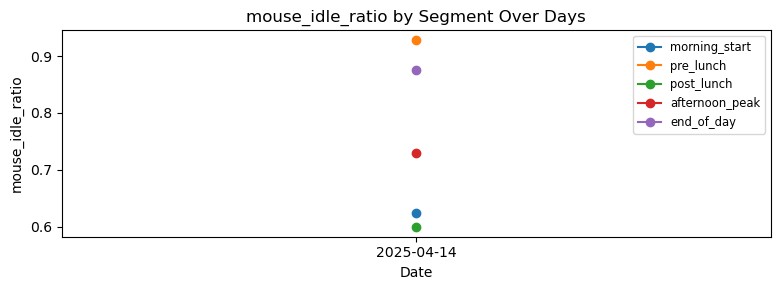

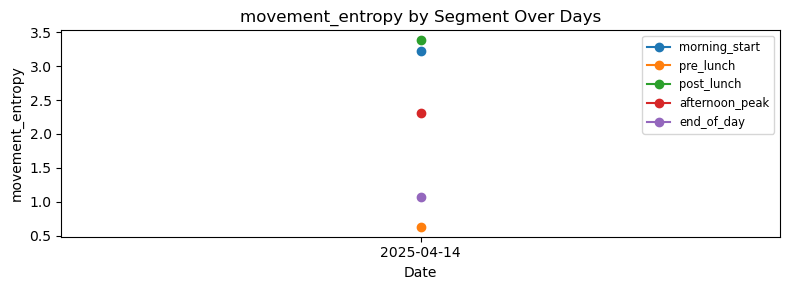

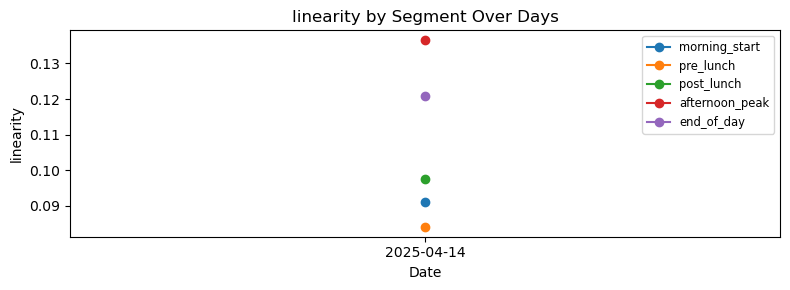

In [7]:
# 6) Time series plots for each feature
for feat in features:
    plt.figure(figsize=(8,3))
    for seg in ["morning_start","pre_lunch","post_lunch","afternoon_peak","end_of_day"]:
        sub = summary[summary["segment"]==seg]
        plt.plot(sub["date"], sub[feat], marker="o", label=seg)
    plt.title(f"{feat} by Segment Over Days")
    plt.xlabel("Date")
    plt.ylabel(feat)
    plt.legend(loc="best", fontsize="small")
    plt.tight_layout()
    plt.show()

C:\Users\feyza\AppData\Local\Temp\ipykernel_17312\1587253499.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=["MS","PL","PS","AP","ED"])
C:\Users\feyza\AppData\Local\Temp\ipykernel_17312\1587253499.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=["MS","PL","PS","AP","ED"])
C:\Users\feyza\AppData\Local\Temp\ipykernel_17312\1587253499.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=["MS","PL","PS","AP","ED"])
C:\Users\feyza\AppData\Local\Temp\ipykernel_17312\1587253499.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot

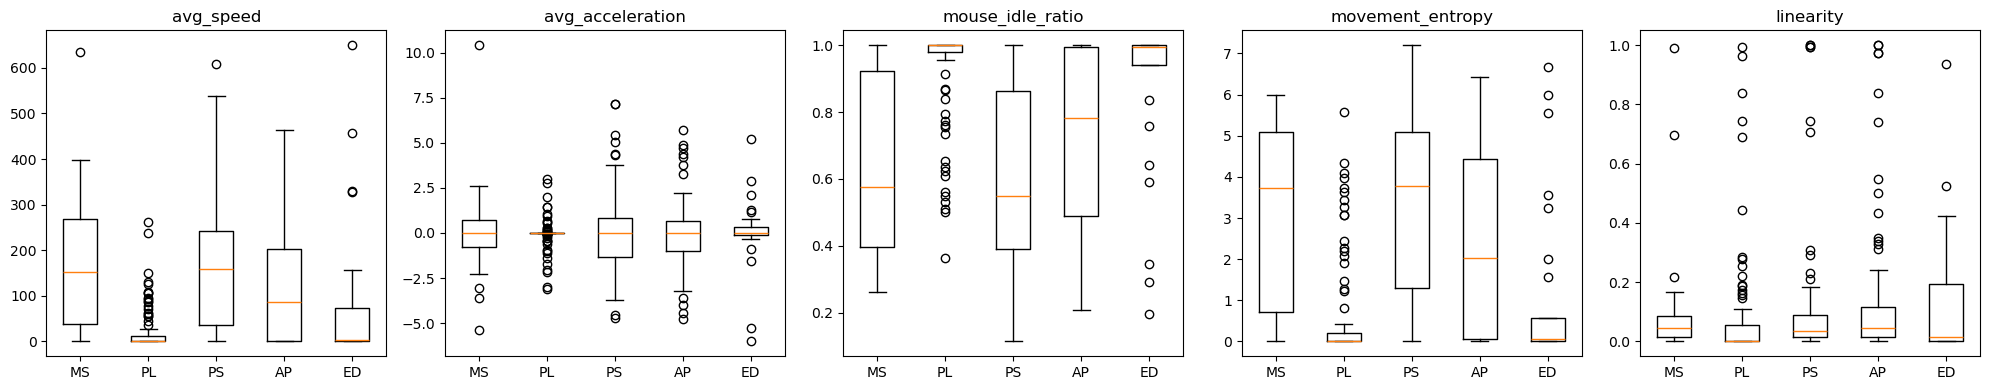

In [8]:
# 7) Boxplots for each feature across segments
fig, axes = plt.subplots(1, len(features), figsize=(4*len(features),4))
segs = ["morning_start","pre_lunch","post_lunch","afternoon_peak","end_of_day"]
for ax, feat in zip(axes, features):
    data = [df_user[df_user["segment"]==s][feat] for s in segs]
    ax.boxplot(data, labels=["MS","PL","PS","AP","ED"])
    ax.set_title(feat)
plt.tight_layout()
plt.show()